In [22]:
from gradio_annotator_vsai import hed, oneformer_ade20k, uniformer

0.08336424827575684


/home/ubuntu/ControlNet-v1-1-nightly/annotator/uniformer/mmseg/models/segmentors/base.py:271: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


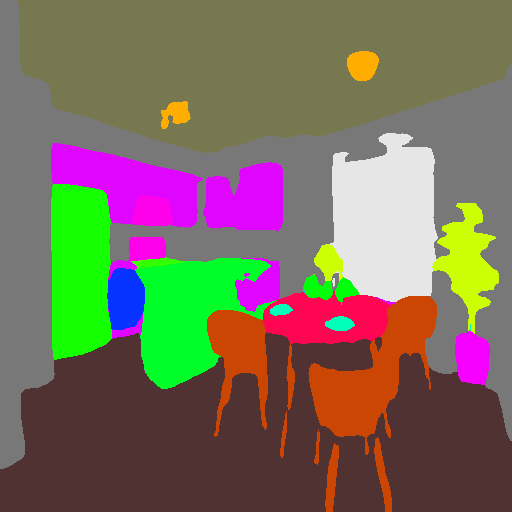

In [28]:
from PIL import Image
import numpy as np
image = Image.open("./image_1_B.jpg")
start = time.time()
res = uniformer(np.array(image.resize((512,512))), 512)
print(time.time() - start)
Image.fromarray(res[0])

In [34]:
import os
import sys
import cv2
import numpy as np
import time
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
from contextlib import contextmanager

@contextmanager
def suppress_output():
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        old_stderr = sys.stderr
        sys.stdout = devnull
        sys.stderr = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr

def load_image(image_path):
    return cv2.imread(image_path)

def segment_folder(in_folder, out_folder, batch_size=500):
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)

    image_files = [f for f in os.listdir(in_folder) if os.path.isfile(os.path.join(in_folder, f))]

    with ThreadPoolExecutor() as executor:
        for i in tqdm(range(0, len(image_files), batch_size), desc="Processing images"):
            batch_files = image_files[i:i + batch_size]
            batch_image_paths = [os.path.join(in_folder, f) for f in batch_files]
            batch_output_paths = [os.path.join(out_folder, f) for f in batch_files]

            # Load images in parallel
            start = time.time()
            batch_images = list(executor.map(load_image, batch_image_paths))
            print(f'loaded {len(batch_images)} in {time.time() - start:.2f}')

            # Process images sequentially
            for idx, image in enumerate(batch_images):
                output_path = batch_output_paths[idx]

                if not os.path.exists(output_path):
                    # start = time.time()
                    try:
                        res = uniformer(image, 512)
                        # print(f'generated in {time.time() - start:.2f}s')

                        segmented_image = cv2.cvtColor(res[0], cv2.COLOR_BGR2RGB)
                        cv2.imwrite(output_path, segmented_image)
                    except Exception as e:
                        print(f'skipping {output_path}')
                        pass
                    

# Example usage:
# segment_folder("./input_folder", "./output_folder")


In [ ]:
segment_folder("/home/ubuntu/staged_pairs/staged_rooms/", "/home/ubuntu/staged_pairs/staged_rooms_seg")

Processing images:   1%|          | 1/96 [00:01<02:31,  1.60s/it]

loaded 500 in 1.60


Processing images:   2%|▏         | 2/96 [00:03<02:59,  1.91s/it]

loaded 500 in 2.12


Processing images:   3%|▎         | 3/96 [00:05<02:43,  1.75s/it]

loaded 500 in 1.57


Processing images:   4%|▍         | 4/96 [00:07<02:41,  1.75s/it]

loaded 500 in 1.75
loaded 500 in 1.71
skipping /home/ubuntu/staged_pairs/staged_rooms_seg/HoangDuc3sortiert_.ds_store


Processing images:   5%|▌         | 5/96 [00:22<10:13,  6.74s/it]

loaded 500 in 1.58


Processing images:   6%|▋         | 6/96 [01:10<31:19, 20.88s/it]

loaded 500 in 1.41


Processing images:   7%|▋         | 7/96 [01:58<44:02, 29.69s/it]

loaded 500 in 1.52


Processing images:   8%|▊         | 8/96 [02:46<52:00, 35.46s/it]

loaded 500 in 1.31


Processing images:   9%|▉         | 9/96 [03:34<56:52, 39.23s/it]

loaded 500 in 1.40


Processing images:  10%|█         | 10/96 [04:24<1:01:12, 42.70s/it]

loaded 500 in 1.39


Processing images:  11%|█▏        | 11/96 [05:12<1:02:47, 44.32s/it]

loaded 500 in 2.07


In [ ]:
segment_folder("/home/ubuntu/staged_pairs/empty_rooms/", "/home/ubuntu/staged_pairs/empty_rooms_seg")